# ASIGNEMENT 3
Name : Victor Garcia Cervantes, Paula Cantí Herreros, Marta Campo Mascaray

student ID : 

## Exercise 1
Try to find the optimal configuration for smaller problem; up to N = 11


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [133]:
# Start off by defining some functions that we will use several times
def distance(r1,r2):
    '''Given two different positions, this function returns the distance modulus between these two positions.'''
    return np.linalg.norm(r2 - r1)

def energy(r):
    '''Being r a vector containing the position of several particles in a system:
    - r = ([x_1,y_1],[x_2,y_2],...[x_N,y_N])
    this function computes and returns the energy of the overall system'''
    
    N = len(r)
    total_E = 0
    
    for i in range(N):
        for j in range(N):
            if i!=j:  # Since obviously the i-th particle does not increase its own energy
                
                # Firstly we extract the positions of the i and j particles
                r1 = r[i]
                r2 = r[j]
                
                # Compute the contribution of the interaction between particles i and j to the 
                #  overall Energy 
                E = 1/distance(r1,r2)
                
                total_E += E
                
    return total_E

def force(r,i):
    '''This function computes the force that particle i feels from all the other particles in the system.
    Given the vector r:
    - r = ([x_1,y_1],[x_2,y_2],...[x_N,y_N])
    the value of the overall force is returned as a vector.'''
    N = len(r)
    total_F = np.zeros(shape = (2,1))
    
    for j in range(N):
        if i!=j:  # Since particle i does not interact with itself
            vect = []
                
            # Firstly we extract the positions of the i and j particles
            r1 = r[i]
            r2 = r[j]
                
            dis = [r1[0] - r2[0] , r1[1] - r2[1]]  # Vector that shows the direction of the Force
            distance_cubed = ( distance(r1,r2) )**3  
            
            F_x = dis[0] / distance_cubed
            F_y = dis[1] / distance_cubed
            
            total_F[0] += F_x
            total_F[1] += F_y
            
    return total_F

def circle(r_i):
    '''remember while loops only run when the condition is True, therefore once we have found a point inside 
    the circle we need to return False, so the loop finishes and we can continue'''
    return np.linalg.norm(r_i) <= 1
    
def specific_heat(E,T):
    '''E is an array containing all the energy values attempted'''
    E_squared_avg = np.mean(np.array(E) ** 2)
    E_avg_squared = np.mean(E) ** 2
    return (E_squared_avg - E_avg_squared) / (T ** 2)
    
    
def annealing_step(r,T,Niter):
    '''Function that realizes one step for a given T of the annealing method'''
    
    E_0 = energy(r)  # Energy of the original configuration
    energies = []
    
    # realize Niter iterations before we reduce the temperature
    for _ in range(Niter):
        
        # repeat this process for each particle of the system
        for i in range(len(r)):
            r_i = r[i]
            
            # Keep creating new points until they are inside the circle, and to make sure that our points 
            #  maintain themselves inside the circle.
            while True:
                Ar_x = np.random.uniform(-0.01,0.01)
                Ar_y = np.random.uniform(-0.01,0.01)
            
                r_x = r_i[0] + Ar_x # Updating x-position of the modified particle
                r_y = r_i[1] + Ar_y # Updating y_position of the modified particle

                new_r_i = [r_x,r_y]
                if circle(new_r_i):
                    break
                    
            
            new_r = r.copy()
            new_r[i] = new_r_i
            
            E_f = energy(new_r)
            
            if E_f < E_0:
                # If the energy of the new configuration is lower we accept the new configuration
                r = new_r
            else:
                AE = E_f - E_0  # Define the Energy difference

                p = np.exp(-AE/T)
                if np.random.uniform() <= p:  # Metropolis criteria 
                    r = new_r
                    energies.append(energy(r))

            E_0 = energy(r)  # Actualize the value of the original energy, according to the current configuration
            energies.append(E_0)
        
    C_T = specific_heat(energies,T) # Compute the corresponding specific heat for this temperature
    print(f'FINAL VALUES \n r = {r} \n Specific heat = {C_T} \n Energy = {E_0}')
        
    return r,C_T,E_0

In [135]:
## TESTING FOR ANNEALING_STEP #########
N = 3
r = np.random.uniform(-1,1,size = (N,2))
for i in range(N):
    #print(i)
    while True:
        r_i = r[i]
        if circle(r_i):
            break
        r[i] = np.random.uniform(-1,1,size = (1,2))
print(f'Initial configuration = {r}')

T = 100
Niter = 100
final_r,specific_heats,energies = annealing_step(r,T,Niter)

Initial configuration = [[-0.298627    0.38557868]
 [-0.15085856 -0.25366181]
 [-0.76763311  0.63295776]]
FINAL VALUES 
 r = [[-0.26194222  0.43050388]
 [-0.11168139 -0.22537362]
 [-0.80382078  0.5821564 ]] 
 Specific heat = 3.0187110426027173e-06 
 Energy = 8.407113332760712


In [139]:
def annealing_method(N,Niter,Tmax):
    ''''''
    Number_T = 100 # Number of temperatures we are going to compute
    
    # Start off by genereting N particles positioned inside the circle
    T = Tmax
    r = np.random.uniform(-1,1,size = (N,2))
    for i in range(N):
        while True:
            r_i = r[i]
            print(f'distance of Current studied r_i : {np.sqrt(r_i[0]**2 + r_i[1]**2)}')
            if circle(r_i):
                break
            r[i] = np.random.uniform(-1,1,size = (1,2))

    
    temperatures = []
    energies = []
    specific_heats = []
    for _ in range(Number_T):
        
        temperatures.append(T)
        
        r,C_T,E = annealing_step(r,T,Niter)
        T = 0.9*T
        
        energies.append(E)
        specific_heats.append(C_T)
        
            
    return temperatures,energies,specific_heats

In [140]:
temps,Es,C = annealing_method(3,100,100)

distance of Current studied r_i : 0.673906477180663
distance of Current studied r_i : 0.22790082251767718
distance of Current studied r_i : 0.7088281309062964
FINAL VALUES 
 r = [[ 0.14748182  0.7378963 ]
 [-0.06107087  0.18404992]
 [ 0.12303412 -0.72268686]] 
 Specific heat = 8.379167167186807e-06 
 Energy = 6.910187525419555
FINAL VALUES 
 r = [[ 0.19542475  0.77290304]
 [ 0.0144765   0.22261594]
 [ 0.07290244 -0.72827453]] 
 Specific heat = 1.262645889510252e-06 
 Energy = 6.879803267005279
FINAL VALUES 
 r = [[ 0.269555    0.66498961]
 [-0.04218243  0.27666598]
 [ 0.12826805 -0.72714395]] 
 Specific heat = 1.648586229816268e-05 
 Energy = 7.409888782363363
FINAL VALUES 
 r = [[ 0.21784444  0.65024349]
 [ 0.0225971   0.28459537]
 [ 0.11824607 -0.87326087]] 
 Specific heat = 9.750337493483064e-06 
 Energy = 7.856385471281124
FINAL VALUES 
 r = [[ 0.18167377  0.57659359]
 [ 0.0958875   0.18537704]
 [ 0.12634617 -0.90290382]] 
 Specific heat = 3.0440462896827494e-05 
 Energy = 8.181518

FINAL VALUES 
 r = [[ 0.20107091  0.57683402]
 [-0.41780524  0.04677891]
 [ 0.09692934 -0.63854481]] 
 Specific heat = 0.10191748297678306 
 Energy = 6.427485744959191
FINAL VALUES 
 r = [[ 0.21347328  0.59732211]
 [-0.43391695  0.12359658]
 [ 0.05487291 -0.72481504]] 
 Specific heat = 0.15636945564647356 
 Energy = 6.0376745345991525
FINAL VALUES 
 r = [[ 0.24345345  0.65798393]
 [-0.4619077   0.14137078]
 [ 0.01843513 -0.72469109]] 
 Specific heat = 0.21451284919192032 
 Energy = 5.734687770606506
FINAL VALUES 
 r = [[ 0.22695775  0.6308869 ]
 [-0.46394556  0.1464006 ]
 [-0.00153777 -0.68888718]] 
 Specific heat = 0.18204314861615956 
 Energy = 5.958113776746461
FINAL VALUES 
 r = [[ 0.27887043  0.70633496]
 [-0.56428094  0.06140936]
 [-0.00930026 -0.79640242]] 
 Specific heat = 0.9593216989470144 
 Energy = 5.148718505861746
FINAL VALUES 
 r = [[ 0.33151236  0.74546953]
 [-0.59980674  0.07253674]
 [ 0.01344455 -0.91975665]] 
 Specific heat = 0.2579832816445793 
 Energy = 4.634889748

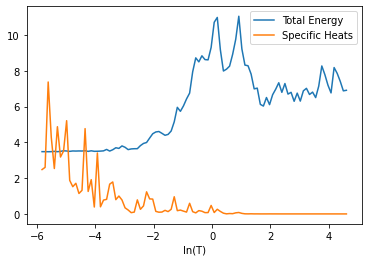

In [141]:
temp_array = np.log(temps)
plt.plot(temp_array,Es, label = 'Total Energy')
plt.plot(temp_array,C,label = 'Specific Heats')
plt.xlabel('ln(T)')
plt.legend()